In [1]:
from os import listdir
from os.path import isfile, join
from sumeval.metrics.rouge import RougeCalculator
import numpy as np
import matplotlib.pyplot as plt

# example

In [2]:

from sumeval.metrics.rouge import RougeCalculator
rouge = RougeCalculator(stopwords=True, lang="en")

rouge_1 = rouge.rouge_n(
            summary="I went to the Mars from my living town.",
            references="I went to Mars",
            n=1)

rouge_2 = rouge.rouge_n(
            summary="I went to the Mars from my living town.",
            references=["I went to Mars", "It's my living town"],
            n=2)

rouge_l = rouge.rouge_l(
            summary="I went to the Mars from my living town.",
            references=["I went to Mars", "It's my living town"])

# You need spaCy to calculate ROUGE-BE

rouge_be = rouge.rouge_be(
            summary="I went to the Mars from my living town.",
            references=["I went to Mars", "It's my living town"])

print("ROUGE-1: {}, ROUGE-2: {}, ROUGE-L: {}, ROUGE-BE: {}".format(
    rouge_1, rouge_2, rouge_l, rouge_be
).replace(", ", "\n"))
    

ROUGE-1: 0.5
ROUGE-2: 0.4
ROUGE-L: 0.6666666666666666
ROUGE-BE: 0.4


In [15]:
# relationship small dataset
path_pre = "/home/ubuntu/cs224u/processed_relationships/baseline"
ref_path = path_pre + '/reference'
reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
dec_path = path_pre + '/decoded'
decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]


In [3]:
reference_files

['t3_4bcuhi_reference.txt',
 't3_3yzftu_reference.txt',
 '6ejvy9_reference.txt',
 'd5axozy_reference.txt',
 't3_29tth3_reference.txt',
 'di3h5hh_reference.txt',
 'd62d0ho_reference.txt',
 '64tr5t_reference.txt',
 't3_1udtww_reference.txt']

In [2]:
def computeRougeScore(path_pre, alpha_input = 0.5, consider_first = 0, if_rouge_be = False, 
                      random_test = True,
                      first_str_in_ref = 0, print_progress = False, print_result = False,
                     ref_folder = '/reference/', decode_folder = '/decoded/', 
                     look_at_subred = None, file_to_subred_mapping = None):
    '''
    input: a working directory indicate where the reference and decode files are
    '''
    # setup working directory
    ref_path = path_pre + ref_folder
    dec_path = path_pre + decode_folder
    
    if look_at_subred is not None and file_to_subred_mapping is not None :
        reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f)) and 
                          file_to_subred_mapping[f[:6]] == look_at_subred]
        reference_files.sort()
        #reference_files = reference_files[:5000]: to deal with the large AskReddit Dataset
        decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f)) and 
                          file_to_subred_mapping[f[:6]] == look_at_subred]
        decoded_files.sort()
        #decoded_files = decoded_files[:5000]: to deal with the large AskReddit Dataset
    else:
        reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
        reference_files.sort()
        #reference_files = reference_files[:5000]: to deal with the large AskReddit Dataset
        decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]
        decoded_files.sort()
        #decoded_files = decoded_files[:5000]: to deal with the large AskReddit Dataset
    
    
    rouge = RougeCalculator(stopwords=False, lang="en")
#     if consider_first:
#         reference_files = reference_files[:consider_first]
#         decoded_files = decoded_files[:consider_first]
    num_file = len(reference_files)
    
    # select random(or first) part of the data 
    if random_test and consider_first > 0:
        chosen_index = np.random.choice(num_file, consider_first, replace = False)
    elif consider_first > 0:
        chosen_index = np.arange(consider_first)
    else:
        chosen_index = np.arange(num_file)
    
    num_file = len(chosen_index)
    
    rouge_1 = np.zeros(num_file)
    rouge_2 = np.zeros(num_file)
    rouge_l = np.zeros(num_file)
    rouge_be = np.zeros(num_file)
    
    
    for i, indx in enumerate(chosen_index):
        
        if i % 500 == 0 and print_progress:
            print('calculating i, finished', i/num_file)
            
        f_ref = open(ref_path + reference_files[indx], 'r').read()
#         print(f_ref[:10])
        if first_str_in_ref:
            f_ref = f_ref[:int(len(f_ref) * first_str_in_ref)]
        f_decode = open( dec_path + decoded_files[indx], 'r').read()
#         print(reference_files[i], decoded_files[i])
        rouge_1[i] = rouge.rouge_n(
            summary=f_decode,
            references=f_ref,
            n=1,alpha = alpha_input)

        rouge_2[i] = rouge.rouge_n(
            summary=f_decode,
            references=f_ref,
            n=2, alpha = alpha_input)

        rouge_l[i] = rouge.rouge_l(
            summary=f_decode,
            references=f_ref,alpha = alpha_input)
        
        if if_rouge_be:
            rouge_be[i] = rouge.rouge_be(
                summary=f_decode,
                references=f_ref,alpha = alpha_input)

    rouge_1_average = np.mean(rouge_1)    
    rouge_2_average = np.mean(rouge_2)    
    rouge_l_average = np.mean(rouge_l)
    if print_result:
        print("in total ", len(chosen_index), "examples")
        print("rouge_1_average score:", rouge_1_average)
        print("rouge_2_average score:", rouge_2_average)
        print("rouge_l_average score:", rouge_l_average)
    
    if if_rouge_be:
        rouge_be_average = np.mean(rouge_be)
        print("rouge_be_average score:", rouge_be_average)   
        return [rouge_1_average, rouge_2_average, rouge_l_average, rouge_be_average]
    
    return [rouge_1_average, rouge_2_average, rouge_l_average]

In [32]:
# relationship small dataset
path_pre = "/home/ubuntu/cs224u/processed_relationships/baseline"


computeRougeScore(path_pre,alpha_input = 0.5) # return: precision, recall, f1

rouge_1_average score: 0.17448384037694867
rouge_2_average score: 0.028741521495144688
rouge_l_average score: 0.12528579276117954
rouge_be_average score: 0.05478750640040962


In [120]:
# pretrained model
path_pre = '/home/ubuntu/cs224u/pointer/log/pretrained_model/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410'
computeRougeScore(path_pre,alpha_input = 0.5, print_result=True) # return: rouge1 rouge2, rougel
# computeRougeScore(path_pre, alpha_input = 0.5, ref_folder = '/content/', decode_folder = '/reference/')

in total  4459 examples
rouge_1_average score: 0.14524432050248826
rouge_2_average score: 0.0262261693517867
rouge_l_average score: 0.10016417609387036


[0.14524432050248826, 0.0262261693517867, 0.10016417609387036]

In [34]:
# our training
path_pre = '/home/ubuntu/cs224u/pointer/log/reddit_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-39995_cov_init_cov_init'

computeRougeScore(path_pre,alpha_input = 0.5)

rouge_1_average score: 0.13774893754386922
rouge_2_average score: 0.031008597706054207
rouge_l_average score: 0.10987995815993751
rouge_be_average score: 0.02278000647831357


In [37]:
# lead-3 baseline
path_pre = '../AskReddit_baseline_summarization'

computeRougeScore(path_pre,alpha_input = 0.5)

rouge_1_average score: 0.1518306825952093
rouge_2_average score: 0.027848149178214408
rouge_l_average score: 0.10711039495037253
rouge_be_average score: 0.027821014579900872


In [3]:
# pretrained on relationships

path_pre = './log/pretrained_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410_cov_init_cov_init'

computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)
# computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=1000, 
#                   ref_folder = '/content/', decode_folder = '/decoded/',
#                  print_result=True)

in total  119 examples
rouge_1_average score: 0.15243363615360483
rouge_2_average score: 0.02640599118214271
rouge_l_average score: 0.11181573118002303


[0.15243363615360483, 0.02640599118214271, 0.11181573118002303]

In [5]:
# full tuned on relationships

path_pre = './log/pretrained_full_tune_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238965_cov_init'

computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)
# computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=1000, 
#                   ref_folder = '/reference/', decode_folder = '/decoded/',
#                  print_result=True)

in total  119 examples
rouge_1_average score: 0.20289855193474882
rouge_2_average score: 0.05666682703407628
rouge_l_average score: 0.1569817754930441


[0.20289855193474882, 0.05666682703407628, 0.1569817754930441]

In [7]:
# fine tuned on relationships

path_pre = './log/pretrained_fine_tune_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238949_cov_init'

computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)
# computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=1000, 
#                   ref_folder = '/reference/', decode_folder = '/decoded/',
#                  print_result=True)

in total  119 examples
rouge_1_average score: 0.210399892937429
rouge_2_average score: 0.061066517631897736
rouge_l_average score: 0.16126166888240775


[0.210399892937429, 0.061066517631897736, 0.16126166888240775]

In [ ]:
# pretrain v.s. full tune v.s. fine tune on relationship 1000
# pretrain
rouge_1_average score: 0.15243363615360483
rouge_2_average score: 0.02640599118214271
rouge_l_average score: 0.11181573118002303
    
# pretrain + full tune
rouge_1_average score: 0.20289855193474882
rouge_2_average score: 0.05666682703407628
rouge_l_average score: 0.1569817754930441
    
# pretrain + fine tune
rouge_1_average score: 0.210399892937429
rouge_2_average score: 0.061066517631897736
rouge_l_average score: 0.16126166888240775

In [3]:
# our model on 10_1000

path_pre = '/home/ubuntu/cs224u/pointer/log/mymodel_combine_all_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_50_min_dec_steps_10_lr_0.15/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-17436_cov_init'

computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)
# computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=1000,
#                   first_str_in_ref=200, ref_folder = '/content/', decode_folder = '/reference/')

in total  1165 examples
rouge_1_average score: 0.1285903161542736
rouge_2_average score: 0.024403407513581533
rouge_l_average score: 0.10796030216648057


[0.1285903161542736, 0.024403407513581533, 0.10796030216648057]

In [18]:
def make_decode_to_sub_mapping(story_list_dir, combined_decoded_dir, subreddit_names):

    text_file = open(story_list_dir, "r")
    story_file_list = [ l for l in text_file.read().split('\n')][:-1]

    decoded_file_list =  [f.split('.')[0] for f in listdir(combined_decoded_dir) if isfile(join(combined_decoded_dir, f))]

    decode_to_sub_mapping = {}

    for sub in subreddit_names:
        for story_name, decode_name in zip(story_file_list, decoded_file_list):
            if sub in story_name:
                decode_to_sub_mapping[decode_name[:6]] = sub
    return decode_to_sub_mapping

# decoded_file_list.sort()

In [19]:
decode_to_sub_mapping = make_decode_to_sub_mapping(story_list_dir, combined_decoded_dir, subreddit_names)

In [29]:
# print the individual result of the combined training
story_list_dir = '/home/ubuntu/cs224u/processed_10_1k/processed_combine_all/combine_test_list.txt'
combined_decoded_dir = '/home/ubuntu/cs224u/pointer/log/combine_all_exp/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-17502_cov_init/decoded'

subreddit_names = ['relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

decode_to_sub_mapping = make_decode_to_sub_mapping(story_list_dir, combined_decoded_dir, subreddit_names)

path_pre = '/home/ubuntu/cs224u/pointer/log/combine_all_exp/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-17502_cov_init'

SubReddits_to_include_10 = [ 'relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

for sub in SubReddits_to_include_10:
    print(sub, ' result::::::::::')
    computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, 
                  print_result=True, 
                 look_at_subred=sub, file_to_subred_mapping = decode_to_sub_mapping)



relationships  result::::::::::
in total  119 examples
rouge_1_average score: 0.15849781168550597
rouge_2_average score: 0.03153210421509397
rouge_l_average score: 0.13055311691809487
legaladvice  result::::::::::
in total  118 examples
rouge_1_average score: 0.15622263357211644
rouge_2_average score: 0.03729189839674535
rouge_l_average score: 0.1283764848845192
nfl  result::::::::::
in total  111 examples
rouge_1_average score: 0.1539894897630392
rouge_2_average score: 0.04105680241121961
rouge_l_average score: 0.12900942325628725
pettyrevenge  result::::::::::
in total  117 examples
rouge_1_average score: 0.1644951245475429
rouge_2_average score: 0.04984337324515147
rouge_l_average score: 0.14145267667381425
atheismbot  result::::::::::
in total  119 examples
rouge_1_average score: 0.1571537579703957
rouge_2_average score: 0.03920384350326892
rouge_l_average score: 0.13166941406772317
ShouldIbuythisgame  result::::::::::
in total  111 examples
rouge_1_average score: 0.151729904034327

In [61]:
# print the individual result of the combined training
story_list_dir = '/home/ubuntu/cs224u/processed_10_1k/processed_combine_all/combine_test_list.txt'
combined_decoded_dir = '/home/ubuntu/cs224u/pointer/log/combine_all_exp/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-17502_cov_init/decoded'

subreddit_names = ['relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

decode_to_sub_mapping = make_decode_to_sub_mapping(story_list_dir, combined_decoded_dir, subreddit_names)

path_pre = '/home/ubuntu/cs224u/pointer/log/mymodel_combine_all_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_50_min_dec_steps_10_lr_0.15/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-17436_cov_init'

SubReddits_to_include_10 = [ 'relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

for sub in SubReddits_to_include_10:
    print(sub, ' result::::::::::')
    computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, 
                      print_result=True, 
                     look_at_subred=sub, file_to_subred_mapping = decode_to_sub_mapping)



relationships  result::::::::::
legaladvice  result::::::::::
nfl  result::::::::::
pettyrevenge  result::::::::::
atheismbot  result::::::::::
ShouldIbuythisgame  result::::::::::
ukpolitics  result::::::::::
Dogtraining  result::::::::::
AskHistorians  result::::::::::
Anxiety  result::::::::::


In [54]:
# print the lead-2/3 results

path_pre = '/home/ubuntu/cs224u/pointer/log/baseline-comebine_all_lead2/'

SubReddits_to_include_10 = [ 'relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

for sub in SubReddits_to_include_10:
    print(sub, ' result::::::::::')
    computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, 
                  print_result=True, 
                 look_at_subred=sub, file_to_subred_mapping = decode_to_sub_mapping)


relationships  result::::::::::
in total  119 examples
rouge_1_average score: 0.15040356621771278
rouge_2_average score: 0.025202959855291487
rouge_l_average score: 0.10873971812008684
legaladvice  result::::::::::
in total  118 examples
rouge_1_average score: 0.15863028452902894
rouge_2_average score: 0.02933248383763507
rouge_l_average score: 0.1080298889458904
nfl  result::::::::::
in total  111 examples
rouge_1_average score: 0.15871224048227087
rouge_2_average score: 0.027221915886211274
rouge_l_average score: 0.11207939137194388
pettyrevenge  result::::::::::
in total  117 examples
rouge_1_average score: 0.14804059298148514
rouge_2_average score: 0.026215382377625728
rouge_l_average score: 0.10179465680638504
atheismbot  result::::::::::
in total  119 examples
rouge_1_average score: 0.16224971563912854
rouge_2_average score: 0.032376212883578885
rouge_l_average score: 0.11649625140352397
ShouldIbuythisgame  result::::::::::
in total  111 examples
rouge_1_average score: 0.13872857

In [55]:
# print the lead-2/3 results

path_pre = '/home/ubuntu/cs224u/pointer/log/baseline-comebine_all_lead3/'

SubReddits_to_include_10 = [ 'relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

for sub in SubReddits_to_include_10:
    print(sub, ' result::::::::::')
    computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, 
                  print_result=True, 
                 look_at_subred=sub, file_to_subred_mapping = decode_to_sub_mapping)


relationships  result::::::::::
in total  119 examples
rouge_1_average score: 0.15850538413733006
rouge_2_average score: 0.02473623626526117
rouge_l_average score: 0.10991903290275977
legaladvice  result::::::::::
in total  118 examples
rouge_1_average score: 0.1773223556835235
rouge_2_average score: 0.03084239317407503
rouge_l_average score: 0.11304612337378775
nfl  result::::::::::
in total  111 examples
rouge_1_average score: 0.1713479915001112
rouge_2_average score: 0.030215757477078227
rouge_l_average score: 0.11629813166433371
pettyrevenge  result::::::::::
in total  117 examples
rouge_1_average score: 0.16588169706078407
rouge_2_average score: 0.030900425453985882
rouge_l_average score: 0.1110201885350039
atheismbot  result::::::::::
in total  119 examples
rouge_1_average score: 0.1764058467899222
rouge_2_average score: 0.03672801879786728
rouge_l_average score: 0.12378297509035283
ShouldIbuythisgame  result::::::::::
in total  111 examples
rouge_1_average score: 0.1595052591407

In [5]:
# print the individual training and together training

SubReddits_to_include_10 = ['combine_all', 'relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
                            'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']
# exp_folder_dir = '/decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-1757_cov_init'

for sub in SubReddits_to_include_10:
    print(sub,'result:::::::::')
    ref_path = '/home/ubuntu/cs224u/pointer/log/' + sub + '_exp'
    sub_folder = [f for f in listdir(ref_path) if f[0] == 'd'][0]
    path_pre = '/home/ubuntu/cs224u/pointer/log/' + sub + '_exp/' + sub_folder
    computeRougeScore(path_pre,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)


combine_all result:::::::::
in total  1164 examples
rouge_1_average score: 0.15817978453330553
rouge_2_average score: 0.038528688508180406
rouge_l_average score: 0.13266524343571767
relationships result:::::::::
in total  119 examples
rouge_1_average score: 0.12525299019225103
rouge_2_average score: 0.025543781534426203
rouge_l_average score: 0.112095598052901
legaladvice result:::::::::
in total  118 examples
rouge_1_average score: 0.01720943504730226
rouge_2_average score: 0.0007093199920169055
rouge_l_average score: 0.015630173986726795
nfl result:::::::::
in total  111 examples
rouge_1_average score: 0.027012105816404664
rouge_2_average score: 0.006144794518875825
rouge_l_average score: 0.025154912207059177
pettyrevenge result:::::::::
in total  117 examples
rouge_1_average score: 0.07683100233448827
rouge_2_average score: 0.027478386869204337
rouge_l_average score: 0.07539629782783977
atheismbot result:::::::::
in total  119 examples
rouge_1_average score: 0.1704642067002566
rouge

In [56]:
# print the result of hyper-para searching
ref_path = '/home/ubuntu/cs224u/pointer/log/'
sub_folder = [f for f in listdir(ref_path) if 'fine_tune_exp_hidden' in f]
for folder in sub_folder:
    look_path = ref_path + folder
    try:
        exp_para_name = [f for f in listdir(look_path) if 'decode' in f][0]
        path = look_path + '/' + exp_para_name
        print(folder)
        computeRougeScore(path,alpha_input = 0.5,  if_rouge_be=False, consider_first=0, random_test=False, print_result=True)
    except:
        print('!!!!no', folder)

fine_tune_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_50_min_dec_steps_20_lr_0.03
in total  1164 examples
rouge_1_average score: 0.06029066446085742
rouge_2_average score: 0.0003217797716831448
rouge_l_average score: 0.05886041827459867
fine_tune_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_100_min_dec_steps_10_lr_0.03
in total  1164 examples
rouge_1_average score: 0.012944424411662075
rouge_2_average score: 0.0
rouge_l_average score: 0.012944424411662075
fine_tune_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_100_min_dec_steps_10_lr_0.3
in total  1164 examples
rouge_1_average score: 0.11260193583562358
rouge_2_average score: 0.025486343518514868
rouge_l_average score: 0.10215226619675451
fine_tune_exp_hidden_64_emb_32_batch_16_max_enc_steps_300_max_dec_steps_50_min_dec_steps_20_lr_0.5
in total  1164 examples
rouge_1_average score: 0.14413197791721605
rouge_2_average score: 0.02160925474391756
rouge_l_average score: 0.11393097098653841

In [41]:
ref_path = '/home/ubuntu/cs224u/pointer/log/' + sub + '_exp'
[f for f in listdir(ref_path) if f[0] == 'd']

['decode_test_400maxenc_4beam_10mindec_120maxdec_ckpt-1757_cov_init']

In [35]:
computeRougeScore(path_pre, alpha_input = 0.99,if_rouge_be=False, consider_first=2000, 
                  random_test=True, print_result=True,
                  ref_folder = '/content/', decode_folder = '/decoded/')

in total  2000 examples
rouge_1_average score: 0.7444281817937951
rouge_2_average score: 0.5003590780151564
rouge_l_average score: 0.5965231043409077


[0.7444281817937951, 0.5003590780151564, 0.5965231043409077]

In [9]:
def plot_coverage(path_pre, consider_first, random_test = False, ref_folder = '/content/', decode_folder = '/reference/'):
    str_length = [i *0.1 for i in range(1, 11)]
    r_scores_ref = np.zeros([3, len(str_length)])
    r_scores_dec = np.zeros([3, len(str_length)])
    max_scores_ref = computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=consider_first,
                      first_str_in_ref=50000, random_test = random_test, 
                                       ref_folder = '/content/', decode_folder = '/reference/')
    max_scores_dec = computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=consider_first,
                      first_str_in_ref=50000, random_test = random_test, 
                                       ref_folder = '/content/', decode_folder = '/decoded/')
    for i, s in enumerate(str_length):
        print('calculating ', i ,'/', len(str_length))
        r_scores_ref[:, i]= computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=consider_first,
                      first_str_in_ref=s, random_test = random_test, 
                                              ref_folder = '/content/', decode_folder = '/reference/')
        r_scores_dec[:, i]= computeRougeScore(path_pre, alpha_input = 0.99,  consider_first=consider_first,
                      first_str_in_ref=s, random_test = random_test, 
                                              ref_folder = '/content/', decode_folder = '/decoded/')
    #     r1_scores[0, i] = r1
    r_scores_ref = r_scores_ref / np.array(max_scores_ref).reshape([3,1])
    r_scores_dec = r_scores_dec / np.array(max_scores_dec).reshape([3,1])
    
    labels = ['rouge1', 'rouge2', 'rougel']
    colors = ['red', 'green', 'blue']
    for i in range(3):
        plt.plot([0] + str_length, [0] + list(r_scores_ref[i]), color = colors[i], label = labels[i] + '_ref')
        plt.plot([0] + str_length, [0] + list(r_scores_dec[i]), color = colors[i], ls = '--', label = labels[i] + '_dec')
    plt.xlabel('Content Ratio')
    plt.ylabel('Precision Ratio')
    plt.legend()

calculating  0 / 10
calculating  1 / 10
calculating  2 / 10
calculating  3 / 10
calculating  4 / 10
calculating  5 / 10
calculating  6 / 10
calculating  7 / 10
calculating  8 / 10
calculating  9 / 10


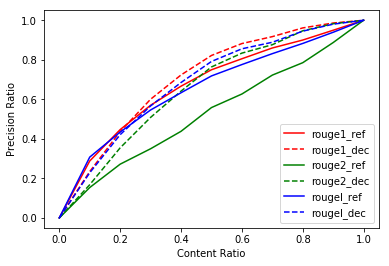

In [12]:
# pretrained on relationships

path_pre = './log/pretrained_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410_cov_init_cov_init'

consider_first = 100

plot_coverage(path_pre, consider_first)

calculating  0 / 10
calculating  1 / 10
calculating  2 / 10
calculating  3 / 10
calculating  4 / 10
calculating  5 / 10
calculating  6 / 10
calculating  7 / 10
calculating  8 / 10
calculating  9 / 10


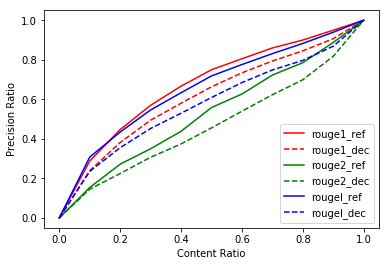

In [14]:
# fine-tuned on relationships

path_pre = './log/pretrained_fine_tune_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238949_cov_init'

consider_first = 100

plot_coverage(path_pre, consider_first)

calculating  0 / 10
calculating  1 / 10
calculating  2 / 10
calculating  3 / 10
calculating  4 / 10
calculating  5 / 10
calculating  6 / 10
calculating  7 / 10
calculating  8 / 10
calculating  9 / 10


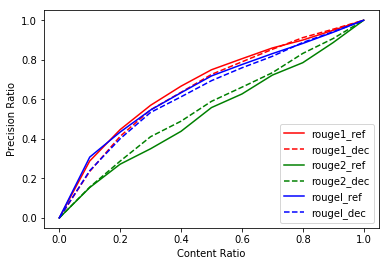

In [15]:
# post-trained on relationships

path_pre = './log/pretrained_full_tune_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238965_cov_init'

consider_first = 100

plot_coverage(path_pre, consider_first)

In [ ]:
result of pretrained on relationships: first 5000 samples
# precision of decoded vs content
rouge_1_average score: 0.9476733773189917
rouge_2_average score: 0.8781008312357037
rouge_l_average score: 0.7871324912436809
    
# precision of reference vs content
rouge_1_average score: 0.6247194098851112
rouge_2_average score: 0.22893374806623992
rouge_l_average score: 0.44880102949302747

# rouge score of decoded vs reference 
rouge_1_average score: 0.20083441528699159
rouge_2_average score: 0.04273009170748925
rouge_l_average score: 0.12879304116662274
    
# rouge score of docoded vs reference (reddit-trained, 2000 examples)    
rouge_1_average score: 0.22215900752330625
rouge_2_average score: 0.0698998361164686
rouge_l_average score: 0.17615150345659464
    
# rouge score of docoded vs reference (reddit-fine-tuned, 2000 examples)    
rouge_1_average score: 0.21079686760037958
rouge_2_average score: 0.06482064476960846
rouge_l_average score: 0.16468544256901335
    
    
    
# on relationships, big 
# precision of decoded vs content (pre-trained, 2000 examples)
rouge_1_average score: 0.9476733773189917
rouge_2_average score: 0.8781008312357037
rouge_l_average score: 0.7871324912436809
    
# precision score of docoded vs content (reddit-fine-tuned, 2000 examples)        
rouge_1_average score: 0.7444281817937951
rouge_2_average score: 0.5003590780151564
rouge_l_average score: 0.5965231043409077

# precision of docoded vs content (reddit-trained, 2000 examples)    
rouge_1_average score: 0.8049491511060715
rouge_2_average score: 0.6190002024114848
rouge_l_average score: 0.6827285338828178
    
    


In [ ]:
# the pointer model v.s. our model
# orginal
rouge_1_average score: 0.15817978453330553
rouge_2_average score: 0.038528688508180406
rouge_l_average score: 0.13266524343571767
    
# our model    
rouge_1_average score: 0.1285903161542736
rouge_2_average score: 0.024403407513581533
rouge_l_average score: 0.10796030216648057

# not relavant below

In [23]:
def rouge_eval(ref_dir, dec_dir):
  """Evaluate the files in ref_dir and dec_dir with pyrouge, returning results_dict"""
  r = pyrouge.Rouge155('/home/ubuntu/pyrouge/pyrouge/ROUGE-1.5.5')
  r.model_filename_pattern = '#ID#_reference.txt'
#   r.system_filename_pattern = '(\s+)_decoded.txt'

  r.system_filename_pattern = '(\d+)_decoded.txt'
  r.model_dir = ref_dir
  r.system_dir = dec_dir
  #logging.getLogger('global').setLevel(logging.WARNING) # silence pyrouge logging
  rouge_results = r.convert_and_evaluate()
  return r.output_to_dict(rouge_results)

In [24]:
# compute rouge score on the relationship's small dataset
#ref_dir = '/home/ubuntu/cs224u/processed_relationships/baseline/reference'
#dec_dir = '/home/ubuntu/cs224u/processed_relationships/baseline/decoded'

In [20]:
# compute rouge score on the relationship's small dataset
ref_dir = '/home/ubuntu/cs224u/pointer/log/test_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-2315_cov_init/reference'
dec_dir = '/home/ubuntu/cs224u/pointer/log/test_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-2315_cov_init/decoded'

In [21]:
result = rouge_eval(ref_dir, dec_dir)

2019-05-27 05:54:10,748 [MainThread  ] [INFO ]  Set ROUGE home directory to /home/ubuntu/pyrouge/pyrouge/ROUGE-1.5.5.
2019-05-27 05:54:10,748 [MainThread  ] [INFO ]  Writing summaries.
2019-05-27 05:54:10,749 [MainThread  ] [INFO ]  Processing summaries. Saving system files to /tmp/tmph0cnzion/system and model files to /tmp/tmph0cnzion/model.
2019-05-27 05:54:10,750 [MainThread  ] [INFO ]  Processing files in /home/ubuntu/cs224u/pointer/log/test_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-2315_cov_init/decoded.
2019-05-27 05:54:10,751 [MainThread  ] [INFO ]  Processing 000005_decoded.txt.
2019-05-27 05:54:10,752 [MainThread  ] [INFO ]  Processing 000004_decoded.txt.
2019-05-27 05:54:10,752 [MainThread  ] [INFO ]  Processing 000003_decoded.txt.
2019-05-27 05:54:10,753 [MainThread  ] [INFO ]  Processing 000000_decoded.txt.
2019-05-27 05:54:10,754 [MainThread  ] [INFO ]  Processing 000002_decoded.txt.
2019-05-27 05:54:10,755 [MainThread  ] [INFO ]  Processing 000007_decoded.tx

CalledProcessError: Command '['/home/ubuntu/pyrouge/pyrouge/ROUGE-1.5.5/ROUGE-1.5.5.pl', '-e', '/home/ubuntu/pyrouge/pyrouge/ROUGE-1.5.5/data', '-c', '95', '-2', '-1', '-U', '-r', '1000', '-n', '4', '-w', '1.2', '-a', '-m', '/tmp/tmpmkj1n5cs/rouge_conf.xml']' returned non-zero exit status 255.

In [ ]:
# example

r = Rouge155()
r.system_dir = '/cs224u/processed_relationships/baseline/reference'
r.model_dir = '/cs224u/processed_relationships/baseline/decoded'
r.system_filename_pattern = 'some_name.(\d+).txt'
r.model_filename_pattern = 'some_name.[A-Z].#ID#.txt'

output = r.convert_and_evaluate()
print(output)
output_dict = r.output_to_dict(output)

In [ ]:
output_result = rouge_eval(ref_dir, dec_dir)

In [ ]:
def rouge_log(results_dict, dir_to_write):
  """Log ROUGE results to screen and write to file.

  Args:
    results_dict: the dictionary returned by pyrouge
    dir_to_write: the directory where we will write the results to"""
  log_str = ""
  for x in ["1","2","l"]:
    log_str += "\nROUGE-%s:\n" % x
    for y in ["f_score", "recall", "precision"]:
      key = "rouge_%s_%s" % (x,y)
      key_cb = key + "_cb"
      key_ce = key + "_ce"
      val = results_dict[key]
      val_cb = results_dict[key_cb]
      val_ce = results_dict[key_ce]
      log_str += "%s: %.4f with confidence interval (%.4f, %.4f)\n" % (key, val, val_cb, val_ce)
  tf.logging.info(log_str) # log to screen
  results_file = os.path.join(dir_to_write, "ROUGE_results.txt")
  tf.logging.info("Writing final ROUGE results to %s...", results_file)
  with open(results_file, "w") as f:
    f.write(log_str)